# MODELING PHASE

## Module mporting

In [42]:
import pandas as pd
from utils.essential import *
from utils.preparation import *
from utils.preparation_visualization import *
from utils.preparation_preprocessing import *

In [43]:
# Google Drive access - (Uncoment if required)
#drive.mount('/content/drive')

path_df = '../data/2-features/marketing_campaign_data.csv' # - (Ensure path is correct)
#Dataframe definition
df = pd.read_csv(path_df, low_memory=False)
features= df.copy()

In [27]:
features

Recency  Total_Purchases  Total_Spent  Total_AcceptedCmp
0          58               25      1617000                  0
1          38                6        27000                  0
2          26               21       776000                  0
3          26                8        53000                  0
4          94               19       422000                  0
...       ...              ...          ...                ...
2235       46               18      1341000                  0
2236       56               22       444000                  1
2237       91               19      1241000                  1
2238        8               23       843000                  0
2239       40               11       172000                  0

[2240 rows x 4 columns]

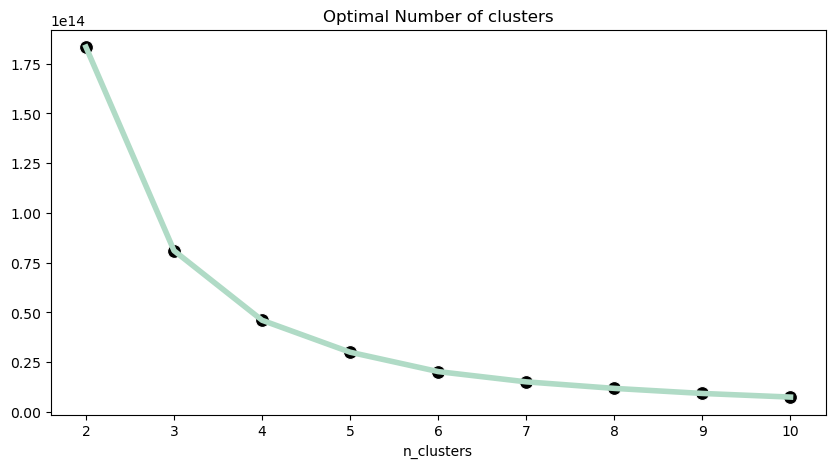

In [50]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10, 5))
plt.title('Optimal Number of clusters')
sns.lineplot(x=range(2, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=100, color='#000',  linestyle='-')
plt.xlabel('n_clusters')
plt.show()

   Recency  Total_Purchases  Total_Spent  Total_AcceptedCmp  Cluster
0       58               25      1617000                  0        0
1       38                6        27000                  0        2
2       26               21       776000                  0        1
3       26                8        53000                  0        2
4       94               19       422000                  0        1
--------------------------------------------------------------------------------
               PC1        PC2  Cluster
0     1.011202e+06   7.896205        0
1    -5.787982e+05 -10.531887        2
2     1.702018e+05 -23.288277        1
3    -5.527982e+05 -22.562008        2
4    -1.837982e+05  45.055510        1
...            ...        ...      ...
2235  7.352018e+05  -3.820946        3
2236 -1.617982e+05   7.026154        1
2237  6.352018e+05  41.271427        3
2238  2.372018e+05 -41.357477        3
2239 -4.337982e+05  -8.683859        2

[2240 rows x 3 columns]


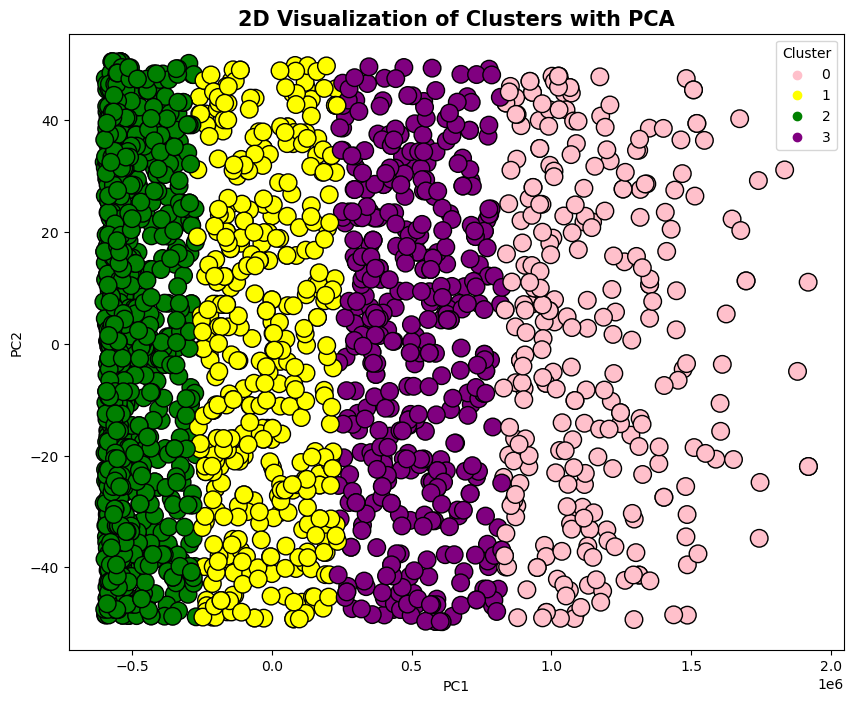

In [79]:
# Optimal number of clusters based on elbow method
optimal_clusters = 4  # Adjust based on the elbow observed

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the DataFrame
features['Cluster'] = clusters

print(features.head())
print("-"*80)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = features['Cluster']
print(df_pca)

# Visualize the clusters in 2D using PCA
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("2D Visualization of Clusters with PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Cluster",
    edgecolor='black',
    data=df_pca,
    palette=['pink', 'yellow', 'green', 'purple'],
    s=160,
    ax=ax
)

plt.show()


# ANALYSIS PHASE

In [85]:
summary_stats = features.groupby('Cluster').agg(['mean', 'median', 'max', 'min'])
# Display the summary statistics
summary_stats


Recency                Total_Purchases                 \
              mean median max min            mean median max min   
Cluster                                                            
0        51.361404   53.0  98   1       21.515789   22.0  44   1   
1        47.195804   46.0  99   0       19.694639   20.0  32   2   
2        49.101584   49.0  99   0        8.122088    7.0  27   0   
3        49.523179   53.0  99   0       22.064018   22.0  39  10   

          Total_Spent                              Total_AcceptedCmp         \
                 mean     median      max      min              mean median   
Cluster                                                                       
0        1.753589e+06  1690000.0  2525000  1435000          1.063158    1.0   
1        5.727902e+05   562000.0   841000   339000          0.226107    0.0   
2        1.004380e+05    66000.0   335000     5000          0.083877    0.0   
3        1.111960e+06  1102000.0  1429000   843000          0.390728    0.0   

                 
        max min  
Cluster          
0         4   0  
1         4   0  
2         2   0  
3         4   0